In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

import os
os.listdir()

['.ipynb_checkpoints',
 'DACON_대구_교통사고예측.ipynb',
 'DACON_대구_교통사고예측_train.ipynb',
 'external_open',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [2]:
train = pd.read_csv('train.csv')
train

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,2021-12-31 19,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,이륜,남,28세,경상,0,0,1,0,3
39605,ACCIDENT_39605,2021-12-31 19,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,상해없음,승용,남,52세,경상,0,0,1,0,3
39606,ACCIDENT_39606,2021-12-31 21,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,중상,승용,남,73세,중상,0,2,0,0,10
39607,ACCIDENT_39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,여,57세,경상,0,0,1,0,3


In [3]:
train.shape

(39609, 23)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [5]:
train.describe()

,사망자수,중상자수,경상자수,부상자수,ECLO
count,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
mean,0.007776,0.262365,1.070085,0.126865,4.726704
std,0.090109,0.500845,0.992034,0.394670,3.207206
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,1.000000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,6.000000
max,2.000000,6.000000,22.000000,10.000000,74.000000


In [6]:
train.isna().sum().to_frame('nan_count')

,nan_count
ID,0
사고일시,0
요일,0
기상상태,0
시군구,0
도로형태,0
노면상태,0
사고유형,0
사고유형 - 세부분류,0
법규위반,0


In [7]:
pd.DataFrame(train.isna().sum() / len(train), columns = ['nan_ratio'])

,nan_ratio
ID,0.00000
사고일시,0.00000
요일,0.00000
기상상태,0.00000
시군구,0.00000
도로형태,0.00000
노면상태,0.00000
사고유형,0.00000
사고유형 - 세부분류,0.00000
법규위반,0.00000


In [8]:
train.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

In [9]:
print(np.all(train[train['피해운전자 차종'].isna()].index == train[train['피해운전자 성별'].isna()].index))
print(np.all(train[train['피해운전자 차종'].isna()].index == train[train['피해운전자 연령'].isna()].index))
print(np.all(train[train['피해운전자 차종'].isna()].index == train[train['피해운전자 상해정도'].isna()].index))

True
True
True


Nan값이 모두 같은 피해운전자에서 나타남

In [10]:
ECLO = train['ECLO'].value_counts().to_frame()
print(len(ECLO))
ECLO

46


,ECLO
3,18675
5,6743
6,4967
1,2578
9,1528
8,1152
4,818
10,611
12,611
11,394


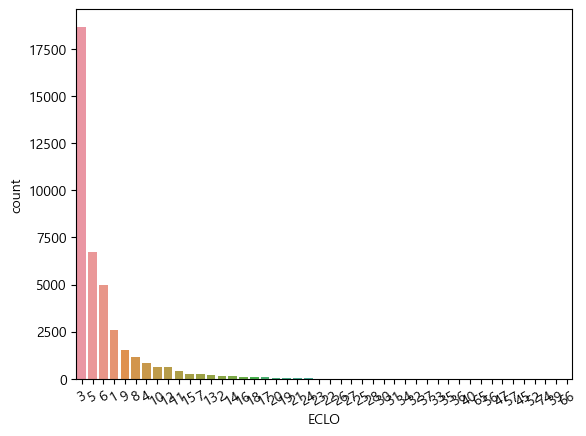

In [11]:
ax = sns.countplot(x = 'ECLO', data = train, order = train['ECLO'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

<AxesSubplot: >

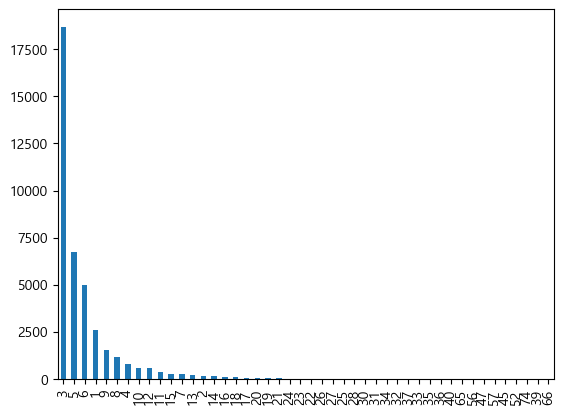

In [12]:
ECLO['ECLO'].plot(kind = 'bar')

ECLO값은 3이 압도적으로 크다.<br>
경상자수가 1명인 경우임

In [13]:
train

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,2021-12-31 19,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,이륜,남,28세,경상,0,0,1,0,3
39605,ACCIDENT_39605,2021-12-31 19,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,상해없음,승용,남,52세,경상,0,0,1,0,3
39606,ACCIDENT_39606,2021-12-31 21,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,중상,승용,남,73세,중상,0,2,0,0,10
39607,ACCIDENT_39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,여,57세,경상,0,0,1,0,3


In [14]:
train.drop('ID', inplace = True, axis = 1)

In [15]:
train

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,상해없음,승용,남,52세,경상,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,2021-12-31 19,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,...,상해없음,이륜,남,28세,경상,0,0,1,0,3
39605,2021-12-31 19,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,승용,...,상해없음,승용,남,52세,경상,0,0,1,0,3
39606,2021-12-31 21,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,승용,...,중상,승용,남,73세,중상,0,2,0,0,10
39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,상해없음,승용,여,57세,경상,0,0,1,0,3


## 시군구 처리

In [16]:
train['시'] = train['시군구'].apply(lambda x: x.split()[0])
train['군'] = train['시군구'].apply(lambda x: x.split()[1])
train['구'] = train['시군구'].apply(lambda x: x.split()[2])
train['군구'] = train['시군구'].apply(lambda x: '\n'.join(x.split()[1:]))

In [17]:
train

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,시,군,구,군구
0,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,...,중상,0,1,0,0,5,대구광역시,중구,대신동,중구\n대신동
1,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,...,경상,0,0,1,0,3,대구광역시,달서구,감삼동,달서구\n감삼동
2,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,...,경상,0,0,1,0,3,대구광역시,수성구,두산동,수성구\n두산동
3,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,중상,0,1,0,0,5,대구광역시,북구,복현동,북구\n복현동
4,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,경상,0,0,1,0,3,대구광역시,동구,신암동,동구\n신암동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,2021-12-31 19,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,...,경상,0,0,1,0,3,대구광역시,수성구,수성동3가,수성구\n수성동3가
39605,2021-12-31 19,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,승용,...,경상,0,0,1,0,3,대구광역시,달서구,상인동,달서구\n상인동
39606,2021-12-31 21,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,승용,...,중상,0,2,0,0,10,대구광역시,달서구,월성동,달서구\n월성동
39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,경상,0,0,1,0,3,대구광역시,달서구,장동,달서구\n장동


In [18]:
for i in ['시','군','구', '군구']:
    print(train[i].value_counts(), end = '\n\n\n')

대구광역시    39609
Name: 시, dtype: int64


달서구    9891
수성구    6707
북구     6650
동구     5341
서구     3495
달성군    2767
남구     2559
중구     2199
Name: 군, dtype: int64


대명동      1749
범어동      1173
상인동      1143
비산동       968
내당동       938
         ... 
완전동         2
신용동         2
동성로1가       2
도남동         2
평광동         1
Name: 구, Length: 196, dtype: int64


남구\n대명동      1749
수성구\n범어동     1173
달서구\n상인동     1143
서구\n비산동       968
서구\n내당동       938
             ... 
중구\n도원동         2
동구\n신용동         2
중구\n동성로1가       2
북구\n도남동         2
동구\n평광동         1
Name: 군구, Length: 199, dtype: int64




In [19]:
train.drop(['시'], axis = 1, inplace = True)
train

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,군,구,군구
0,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,...,70세,중상,0,1,0,0,5,중구,대신동,중구\n대신동
1,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,...,61세,경상,0,0,1,0,3,달서구,감삼동,달서구\n감삼동
2,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,...,38세,경상,0,0,1,0,3,수성구,두산동,수성구\n두산동
3,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,36세,중상,0,1,0,0,5,북구,복현동,북구\n복현동
4,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,52세,경상,0,0,1,0,3,동구,신암동,동구\n신암동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,2021-12-31 19,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,...,28세,경상,0,0,1,0,3,수성구,수성동3가,수성구\n수성동3가
39605,2021-12-31 19,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,승용,...,52세,경상,0,0,1,0,3,달서구,상인동,달서구\n상인동
39606,2021-12-31 21,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,승용,...,73세,중상,0,2,0,0,10,달서구,월성동,달서구\n월성동
39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,57세,경상,0,0,1,0,3,달서구,장동,달서구\n장동


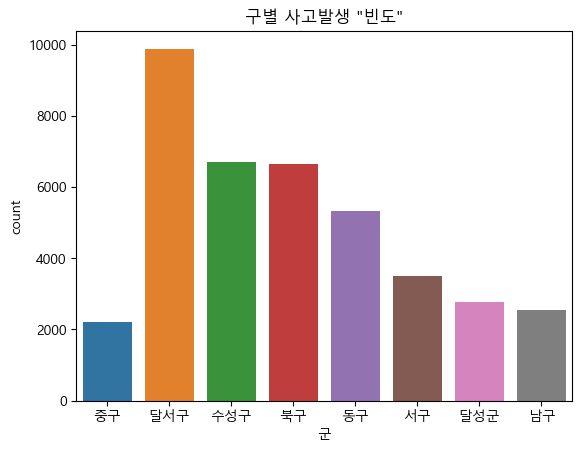

In [20]:
sns.countplot(x = '군', data = train)
plt.title('구별 사고발생 "빈도"')
plt.show()

구마다 사고발생 편차가 크다. 대구 달서구에서 사고발생 빈도가 가장 높아보인다.

In [21]:
train['군'].unique()

array(['중구', '달서구', '수성구', '북구', '동구', '서구', '달성군', '남구'], dtype=object)

In [22]:
a = train.groupby('군').sum()
a = a.reindex(train['군'].unique())
a = a.reset_index()
a

C:\Users\kyw97\AppData\Local\Temp\ipykernel_47932\2819962379.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a = train.groupby('군').sum()


,군,사망자수,중상자수,경상자수,부상자수,ECLO
0,중구,25,544,2137,606,9987
1,달서구,47,2367,10777,1045,45681
2,수성구,29,1683,7410,771,31706
3,북구,55,1886,6793,814,31173
4,동구,54,1428,5919,678,26115
5,서구,26,983,3665,521,16691
6,달성군,58,877,2936,262,14035
7,남구,14,624,2748,328,11832


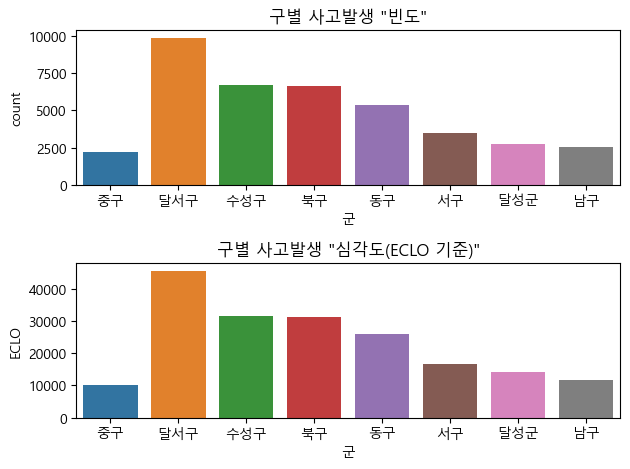

In [23]:
fig, axes = plt.subplots(2)
sns.countplot(x = '군', data = train, ax = axes[0])
axes[0].set_title('구별 사고발생 "빈도"')


sns.barplot(x = '군', y = 'ECLO', data = a,ax = axes[1])
axes[1].set_title('구별 사고발생 "심각도(ECLO 기준)"')

plt.tight_layout()
plt.show()

구별 사고발생 빈도와 ELCO 합산 심각도를 확인해보니<br>
빈도와 심각도가 거의 유사한 것으로 보인다.(왜지)

In [24]:
a = train['군구'].value_counts().to_frame()[:10]
a.reset_index(inplace = True)
a

,index,군구
0,남구\n대명동,1749
1,수성구\n범어동,1173
2,달서구\n상인동,1143
3,서구\n비산동,968
4,서구\n내당동,938
5,수성구\n만촌동,908
6,서구\n평리동,885
7,북구\n산격동,879
8,동구\n신암동,825
9,달서구\n송현동,811


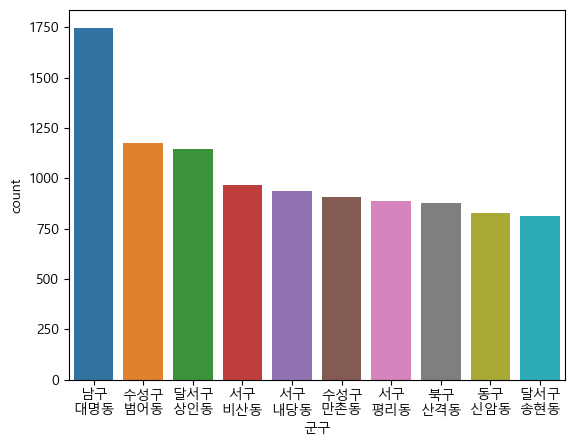

In [25]:
sns.barplot(x = 'index', y = '군구', data = a)
plt.xlabel('군구')
plt.ylabel('count')
plt.show()

남구는 2번째로 사고발생률이 낮은 구에 속하지만, 대부분의 사고가 남구 대명동에서 발생한다.

In [26]:
b = train['군'].value_counts().to_frame()
b

,군
달서구,9891
수성구,6707
북구,6650
동구,5341
서구,3495
달성군,2767
남구,2559
중구,2199


In [27]:
a['동별_사고_ratio'] = a.apply(lambda x: x['군구'] / b.loc[x['index'].split('\n')[0]], axis = 1)
a

,index,군구,동별_사고_ratio
0,남구\n대명동,1749,0.683470
1,수성구\n범어동,1173,0.174892
2,달서구\n상인동,1143,0.115560
3,서구\n비산동,968,0.276967
4,서구\n내당동,938,0.268383
5,수성구\n만촌동,908,0.135381
6,서구\n평리동,885,0.253219
7,북구\n산격동,879,0.132180
8,동구\n신암동,825,0.154465
9,달서구\n송현동,811,0.081994


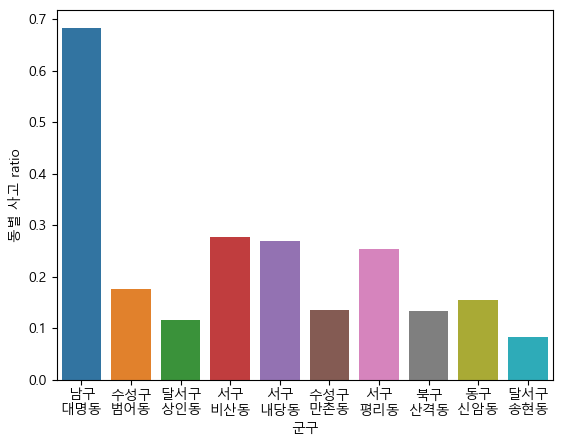

In [28]:
sns.barplot(x = 'index', y = '동별_사고_ratio', data = a)
plt.xlabel('군구')
plt.ylabel('동별 사고 ratio')
plt.show()

남구(사고발생률이 두번째로 낮은 구) 교통사고의 경우 약 0.7프로가 남구 대명동에서 발생한다.

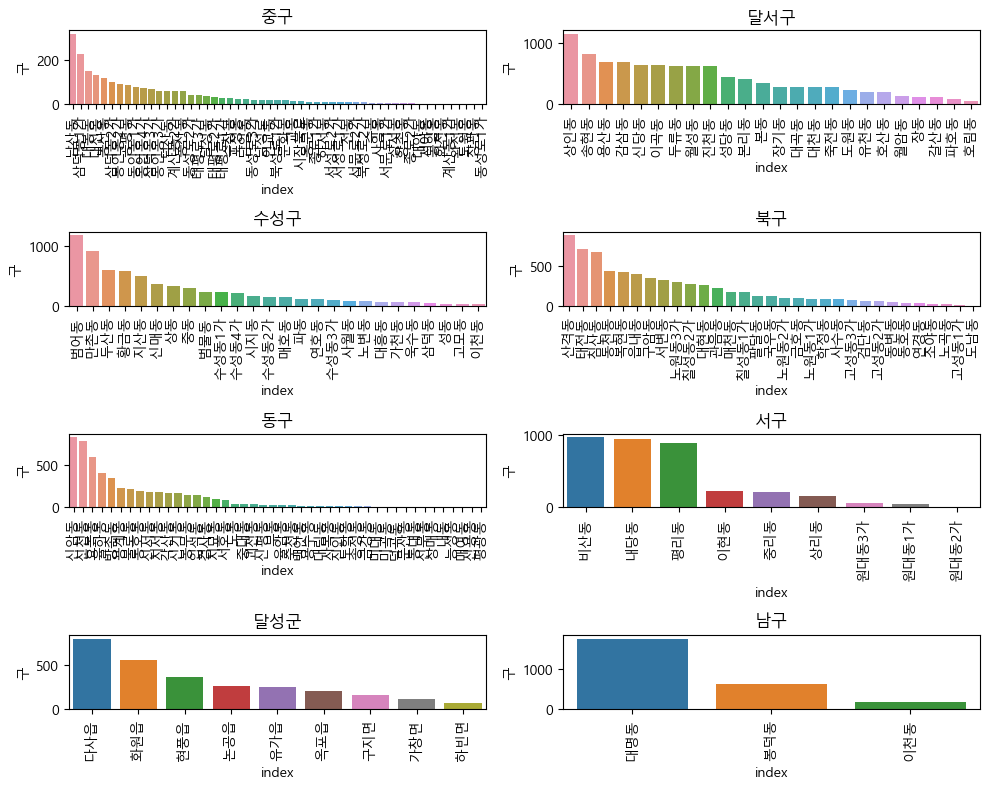

In [29]:
fig, axes = plt.subplots(4,2, figsize = (10,8))

for idx, i in enumerate(train['군'].unique()):
    a = train[train['군'] == i]['구'].value_counts().to_frame()
    a = a.reset_index()
    b = sns.barplot(x = 'index', y = '구', data = a, ax = axes[idx//2, idx%2])
    axes[idx//2, idx%2].set_title(i)
    axes[idx//2, idx%2].tick_params(axis='x', labelrotation=90)
    plt.tight_layout()

plt.show()

각 구에 속하는 동네별 사고 발생률은 위와 같다.<br>
구마다 사고발생률이 큰 동네가 있어보인다.

## 사고발생 시간

In [30]:
a = train.groupby('요일').sum()
a = a.reset_index()
a

C:\Users\kyw97\AppData\Local\Temp\ipykernel_47932\3960934114.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a = train.groupby('요일').sum()


,요일,사망자수,중상자수,경상자수,부상자수,ECLO
0,금요일,46,1550,6485,764,28429
1,목요일,36,1500,5887,744,26265
2,수요일,38,1557,6240,736,27621
3,월요일,57,1530,6264,683,27695
4,일요일,37,1167,4889,563,21435
5,토요일,54,1531,6323,737,27901
6,화요일,40,1557,6297,798,27874


<AxesSubplot: xlabel='요일', ylabel='ECLO'>

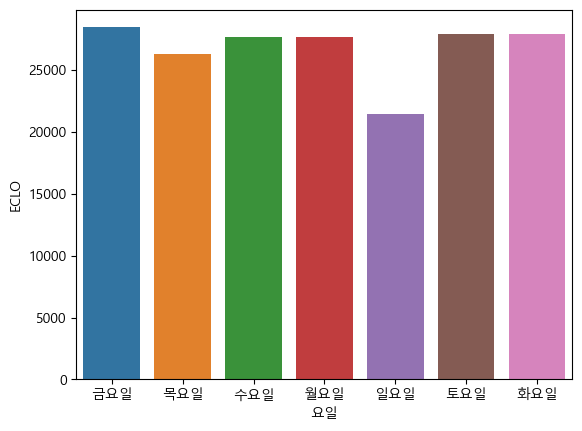

In [31]:
sns.barplot(x = '요일', y ='ECLO', data = a)

일요일에 ECLO 값이 가장 낮았다.

In [32]:
train['사고발생 hour'] = train['사고일시'].apply(lambda x: x.split()[1])

In [33]:
a = train['사고발생 hour'].value_counts().to_frame()
a = a.reset_index()
a

,index,사고발생 hour
0,18,3398
1,17,2772
2,19,2739
3,16,2529
4,15,2374
5,14,2342
6,13,2198
7,20,2154
8,12,2104
9,11,2016


<AxesSubplot: xlabel='index', ylabel='사고발생 hour'>

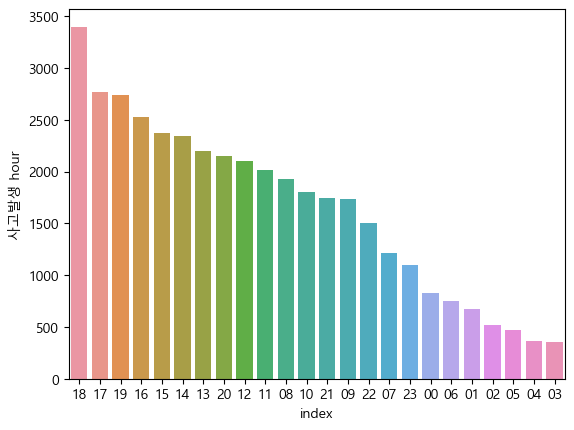

In [34]:
sns.barplot(x = 'index', y = '사고발생 hour', data = a)

모든 요일을 합쳐 확인했을 때 18시가 사고발생 시간이 가장 많았다.

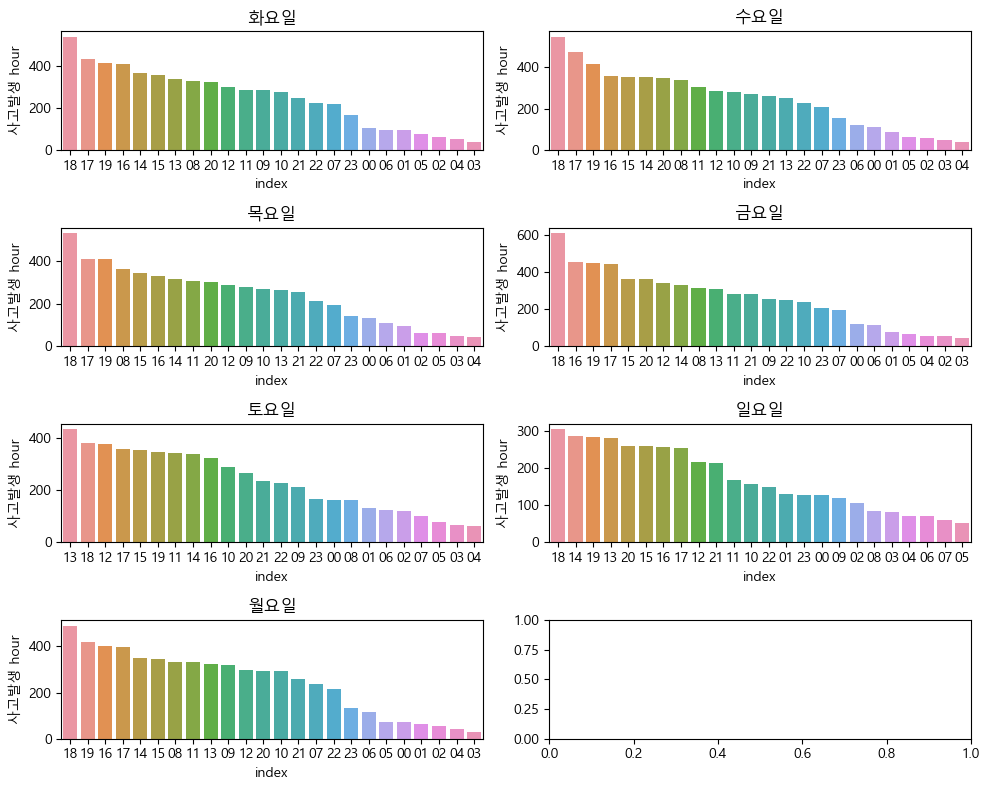

In [35]:
fig, axes = plt.subplots(4,2, figsize = (10,8))
for idx, i in enumerate(train['요일'].unique()):
    a = train[train['요일'] == i]['사고발생 hour'].value_counts().to_frame().reset_index()
    sns.barplot(x = 'index', y = '사고발생 hour', data = a, ax = axes[idx //2 , idx % 2])
    axes[idx//2, idx%2].set_title(i)
    plt.tight_layout()
    
plt.show()

요일별 사고발생시간을 확인해보니,<br>
대부분의 요일에서 18시가 가장 사고발생 빈도가 높았다.

토요일의 경우에만 사고발생 건수가 13시가 18시보다 50건 정도 높았다.

In [36]:
b = train.groupby('사고발생 hour').sum()
hour_ = b.index
hour_

C:\Users\kyw97\AppData\Local\Temp\ipykernel_47932\3040028390.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b = train.groupby('사고발생 hour').sum()


Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object', name='사고발생 hour')

C:\Users\kyw97\AppData\Local\Temp\ipykernel_47932\684860268.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a = train.groupby('사고발생 hour').sum()


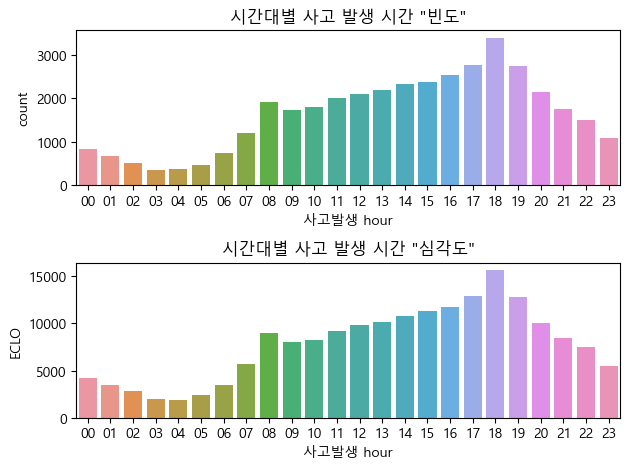

In [37]:
fig, axes = plt.subplots(2)
a = train['사고발생 hour'].value_counts().to_frame()
a = a.reindex(hour_)
a.columns = ['count']
a = a.reset_index()

sns.barplot(x = '사고발생 hour', y = 'count', data = a, ax = axes[0])
axes[0].set_title('시간대별 사고 발생 시간 "빈도"')


a = train.groupby('사고발생 hour').sum()
a = a.reset_index()

sns.barplot(x = '사고발생 hour', y = 'ECLO', data = a, ax = axes[1])
axes[1].set_title('시간대별 사고 발생 시간 "심각도"')

plt.tight_layout()

plt.show()

시간대별 사고 발생 시간 "빈도"와 ECLO를 합산한 사고발생 심각도는 매우 유사해보인다.

In [38]:
train['hour int'] = train['사고발생 hour'].apply(lambda x: int(x))
train['hour cut'] = pd.cut(train['hour int'], bins = [-1,6,12,18,23], labels = ['dawn\n0~6', 'morning\n6~12', 'afternoon\n12~18', 'night\n18~23'])

In [39]:
pd.cut(train['hour int'], bins = [-1,6,12,18,23])

0         (-1, 6]
1         (-1, 6]
2         (-1, 6]
3         (-1, 6]
4         (-1, 6]
           ...   
39604    (18, 23]
39605    (18, 23]
39606    (18, 23]
39607    (18, 23]
39608    (18, 23]
Name: hour int, Length: 39609, dtype: category
Categories (4, interval[int64, right]): [(-1, 6] < (6, 12] < (12, 18] < (18, 23]]

In [40]:
train

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,중상자수,경상자수,부상자수,ECLO,군,구,군구,사고발생 hour,hour int,hour cut
0,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,...,1,0,0,5,중구,대신동,중구\n대신동,00,0,dawn\n0~6
1,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,...,0,1,0,3,달서구,감삼동,달서구\n감삼동,00,0,dawn\n0~6
2,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,...,0,1,0,3,수성구,두산동,수성구\n두산동,01,1,dawn\n0~6
3,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,1,0,0,5,북구,복현동,북구\n복현동,02,2,dawn\n0~6
4,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,0,1,0,3,동구,신암동,동구\n신암동,04,4,dawn\n0~6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,2021-12-31 19,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,...,0,1,0,3,수성구,수성동3가,수성구\n수성동3가,19,19,night\n18~23
39605,2021-12-31 19,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,승용,...,0,1,0,3,달서구,상인동,달서구\n상인동,19,19,night\n18~23
39606,2021-12-31 21,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,승용,...,2,0,0,10,달서구,월성동,달서구\n월성동,21,21,night\n18~23
39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,0,1,0,3,달서구,장동,달서구\n장동,22,22,night\n18~23


C:\Users\kyw97\AppData\Local\Temp\ipykernel_47932\3023206467.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a = train.groupby('hour cut').sum()


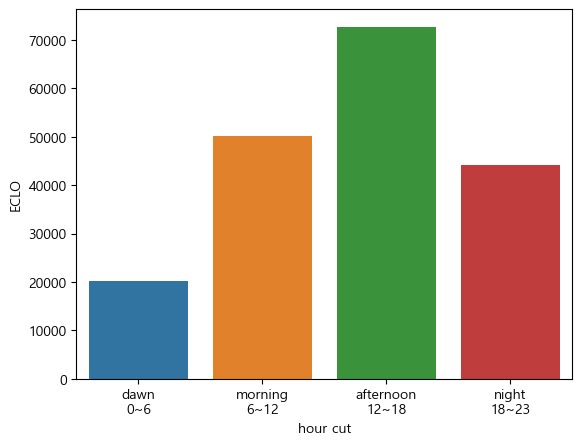

In [41]:
a = train.groupby('hour cut').sum()
a = a.reset_index()

sns.barplot(x = 'hour cut', y = 'ECLO', data = a)
plt.show()

사고 발생 빈도와 심각도는 afternoon(12~18시)에 가장 높다.

## 사망자수 >= 1인 사고 분석

ECLO 계산 시 사망자수에 대한 가중치가 10이므로 우선 사망자수를 기준으로 분석진행

In [42]:
train_dead = train[train['사망자수']>0]
train_dead

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,중상자수,경상자수,부상자수,ECLO,군,구,군구,사고발생 hour,hour int,hour cut
95,2019-01-04 07,금요일,맑음,대구광역시 달서구 이곡동,단일로 - 기타,건조,차대사람,횡단중,안전운전불이행,화물,...,0,0,0,10,달서구,이곡동,달서구\n이곡동,07,7,morning\n6~12
127,2019-01-05 08,토요일,맑음,대구광역시 동구 지묘동,기타 - 기타,건조,차대차,측면충돌,안전운전불이행,화물,...,0,1,0,13,동구,지묘동,동구\n지묘동,08,8,morning\n6~12
164,2019-01-06 12,일요일,맑음,대구광역시 달성군 구지면,교차로 - 교차로안,건조,차대차,측면충돌,과속,이륜,...,0,0,0,10,달성군,구지면,달성군\n구지면,12,12,morning\n6~12
187,2019-01-07 05,월요일,맑음,대구광역시 수성구 만촌동,단일로 - 기타,건조,차대사람,횡단중,안전운전불이행,화물,...,0,0,0,10,수성구,만촌동,수성구\n만촌동,05,5,dawn\n0~6
354,2019-01-12 05,토요일,비,대구광역시 달성군 유가읍,교차로 - 교차로안,젖음/습기,차대차,측면충돌,신호위반,승용,...,4,0,0,40,달성군,유가읍,달성군\n유가읍,05,5,dawn\n0~6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38936,2021-12-10 06,금요일,맑음,대구광역시 달서구 죽전동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,화물,...,0,0,0,10,달서구,죽전동,달서구\n죽전동,06,6,dawn\n0~6
38997,2021-12-12 00,일요일,맑음,대구광역시 동구 방촌동,교차로 - 교차로안,건조,차대사람,횡단중,안전운전불이행,승용,...,0,0,0,10,동구,방촌동,동구\n방촌동,00,0,dawn\n0~6
39049,2021-12-13 19,월요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로부근,건조,차대차,정면충돌,안전운전불이행,승용,...,1,2,0,31,수성구,수성동3가,수성구\n수성동3가,19,19,night\n18~23
39197,2021-12-19 05,일요일,눈,대구광역시 동구 대림동,단일로 - 기타,젖음/습기,차량단독,기타,안전운전불이행,이륜,...,0,0,0,10,동구,대림동,동구\n대림동,05,5,dawn\n0~6


In [43]:
train_dead['사망자수'].value_counts()

1    292
2      8
Name: 사망자수, dtype: int64

사망자가 발생한 사고의 경우 대부분 1명이 사망하고, 드물게 2명이 사망했다.

In [44]:
train_dead['군구'].value_counts().to_frame() / len(train_dead)

,군구
달성군\n논공읍,0.033333
달성군\n화원읍,0.033333
수성구\n만촌동,0.026667
남구\n대명동,0.026667
서구\n내당동,0.023333
...,...
중구\n동성로2가,0.003333
수성구\n이천동,0.003333
중구\n봉산동,0.003333
동구\n덕곡동,0.003333


사망자수가 1명 이상인 군구를 보았을 때 편차가 뚜렷하게 큰 군구는 없어보인다.

In [45]:
train_dead.value_counts('사고유형').to_frame()

,0
사고유형,
차대차,133
차대사람,124
차량단독,43


사망자수가 1명 이상일 때 차대차와 차대사람의 사고유형이 차량단독 사고난 경우보다 많았다.

In [46]:
train_dead.pivot_table(index=['사고유형', '사고유형 - 세부분류'],
                       columns='사망자수',
                       aggfunc='size', fill_value=0)

사망자수               1  2
사고유형 사고유형 - 세부분류       
차대사람 기타           36  1
     보도통행중         5  0
     차도통행중        18  0
     횡단중          64  0
차대차  기타           29  1
     정면충돌         13  2
     추돌           29  0
     측면충돌         58  1
차량단독 공작물충돌        21  3
     기타           10  0
     도로외이탈 - 추락    3  0
     전도전복 - 전도     5  0
     전도전복 - 전복     1  0

사망자수가 2명이 경우는
- 차대사람>기타
- 차대차>기타
- 차대차>정면충돌
- 차량단독>공작물충돌 

In [47]:
a = train_dead['법규위반'].value_counts().to_frame()
a = a.reset_index()
a['법규위반 비율'] = a['법규위반'].apply(lambda x: x/np.sum(a['법규위반']))
a

,index,법규위반,법규위반 비율
0,안전운전불이행,185,0.616667
1,신호위반,36,0.120000
2,과속,22,0.073333
3,기타,19,0.063333
4,중앙선침범,14,0.046667
5,보행자보호의무위반,8,0.026667
6,안전거리미확보,7,0.023333
7,불법유턴,6,0.020000
8,직진우회전진행방해,1,0.003333
9,교차로운행방법위반,1,0.003333


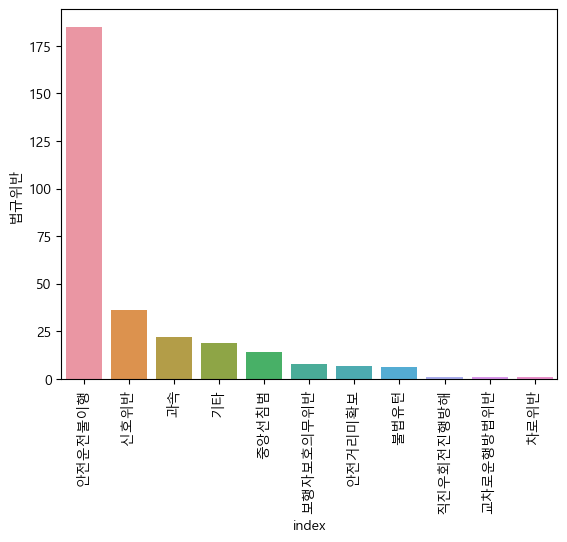

In [48]:
ax = sns.barplot(x = 'index', y= '법규위반', data = a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

사망자수가 발생한 사고의 경우 61퍼센트가 안전운전 불이행이었다.

In [49]:
train_dead_2 = train_dead[train_dead['사망자수']==2]
train_dead_2

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,중상자수,경상자수,부상자수,ECLO,군,구,군구,사고발생 hour,hour int,hour cut
354,2019-01-12 05,토요일,비,대구광역시 달성군 유가읍,교차로 - 교차로안,젖음/습기,차대차,측면충돌,신호위반,승용,...,4,0,0,40,달성군,유가읍,달성군\n유가읍,05,5,dawn\n0~6
3739,2019-04-15 01,월요일,맑음,대구광역시 동구 덕곡동,교차로 - 교차로안,건조,차량단독,공작물충돌,안전운전불이행,승용,...,0,0,0,20,동구,덕곡동,동구\n덕곡동,01,1,dawn\n0~6
8273,2019-08-05 16,월요일,맑음,대구광역시 동구 진인동,단일로 - 기타,건조,차대차,정면충돌,중앙선침범,승용,...,2,0,0,30,동구,진인동,동구\n진인동,16,16,afternoon\n12~18
17985,2020-04-22 12,수요일,맑음,대구광역시 서구 내당동,교차로 - 교차로안,건조,차대차,기타,안전운전불이행,승용,...,1,2,0,31,서구,내당동,서구\n내당동,12,12,morning\n6~12
22004,2020-08-08 14,토요일,비,대구광역시 달성군 옥포읍,단일로 - 기타,젖음/습기,차량단독,공작물충돌,안전운전불이행,승용,...,1,0,0,25,달성군,옥포읍,달성군\n옥포읍,14,14,afternoon\n12~18
35605,2021-09-04 12,토요일,맑음,대구광역시 달서구 대곡동,교차로 - 교차로안,건조,차량단독,공작물충돌,안전운전불이행,승용,...,0,0,0,20,달서구,대곡동,달서구\n대곡동,12,12,morning\n6~12
39049,2021-12-13 19,월요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로부근,건조,차대차,정면충돌,안전운전불이행,승용,...,1,2,0,31,수성구,수성동3가,수성구\n수성동3가,19,19,night\n18~23
39337,2021-12-23 14,목요일,맑음,대구광역시 달성군 옥포읍,단일로 - 기타,건조,차대사람,기타,안전운전불이행,승용,...,0,2,0,26,달성군,옥포읍,달성군\n옥포읍,14,14,afternoon\n12~18


In [50]:
train_dead_2['법규위반'].value_counts().to_frame() / len(train_dead_2)

,법규위반
안전운전불이행,0.750
신호위반,0.125
중앙선침범,0.125


사망자수가 2명이상 발생한 경우 대부분 안전운전불이행인 경우였다.

# train 외 데이터 이용

In [51]:
import os
os.listdir('external_open')

['countrywide_accident.csv',
 '대구 CCTV 정보.csv',
 '대구 보안등 정보.csv',
 '대구 어린이 보호 구역 정보.csv',
 '대구 주차장 정보.csv']

In [52]:
cctv = pd.read_csv(r'external_open/대구 CCTV 정보.csv', encoding='cp949')
cctv

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,NaN,NaN,99.0,2010.0
1,주차13,대구광역시,남구,시도,NaN,봉덕로,3,대구광역시 남구 봉덕로 135,대구광역시 남구 봉덕동 853-8,35.844653,128.604619,효성백년가약,4,0,NaN,NaN,99.0,2013.0
2,주차14,대구광역시,남구,시도,NaN,대봉로,3,대구광역시 남구 봉덕로 134,대구광역시 남구 봉덕동 866-46,35.844183,128.604815,강변코오롱하늘채,4,0,NaN,NaN,99.0,2013.0
3,주차15,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 200,대구광역시 남구 대명동 2680-17,35.834798,128.585284,보성청록타운,4,0,NaN,NaN,99.0,2014.0
4,주차16,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 243,대구광역시 남구 봉덕동 1616,35.832728,128.588324,환경차고지,4,0,NaN,NaN,99.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,H2418,대구광역시,북구,특별시도,NaN,태암남로,1,대구광역시 북구 태암남로 41,대구광역시 북구 구암동 671-8,35.925294,128.552023,구암고교교차로(면허시험장삼거리→구암역),2,40,NaN,NaN,99.0,2021.0
1061,H2419,대구광역시,북구,특별시도,NaN,내곡로,1,대구광역시 북구 내곡로 90,대구광역시 북구 사수동 812,35.900977,128.513825,사수초교앞(삼영초교→사수중학교),2,30,NaN,NaN,2.0,2021.0
1062,H4145,대구광역시,북구,특별시도,NaN,대현로,2,대구광역시 북구 대현로 100,대구광역시 북구 대현동 270-8,35.882191,128.609791,신암초교 남측(공고R)(경대교→공고네거리),2,30,NaN,NaN,2.0,2021.0
1063,H4146,대구광역시,북구,특별시도,NaN,대현로,1,대구광역시 북구 대현로 118,대구광역시 북구 대현동 270-3,35.881737,128.611651,신암초교 남측(경대교)(공고네거리→경대교),2,30,NaN,NaN,2.0,2021.0


In [53]:
sec_light = pd.read_csv('external_open/대구 보안등 정보.csv', encoding='cp949')
sec_light

C:\Users\kyw97\AppData\Local\Temp\ipykernel_47932\1645330831.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  sec_light = pd.read_csv('external_open/대구 보안등 정보.csv', encoding='cp949')


,보안등위치명,설치개수,소재지도로명주소,소재지지번주소,위도,경도,설치연도,설치형태
0,대명1동1,1,대구광역시 남구 현충로 155,대구광역시 남구 대명동 1722-4,35.846703,128.579803,2016.0,한전주
1,대명1동2,1,대구광역시 남구 현충로31길 10-1,대구광역시 남구 대명동 1723-11,35.846863,128.579406,2016.0,한전주
2,대명1동3,1,대구광역시 남구 현충로31길 9-8,대구광역시 남구 대명동 1722-56,35.846341,128.579342,2017.0,건축물
3,대명1동4,2,대구광역시 남구 현충로31길 19-11,대구광역시 남구 대명동 1722-41,35.846368,128.578922,2016.0,한전주
4,대명1동5,1,대구광역시 남구 현충로29길 22-2,대구광역시 남구 대명동 1721-22,35.845995,128.578858,2016.0,한전주
...,...,...,...,...,...,...,...,...
71908,대봉2동 165-9,1,NaN,대구광역시 중구 대봉동 165-9,35.857556,128.600023,NaN,한전주
71909,대봉2동 88-85,1,NaN,대구광역시 중구 대봉동 88-85,35.859205,128.600046,NaN,한전주
71910,대봉2동 719-20,1,NaN,대구광역시 중구 대봉동 719-20,35.859442,128.599627,NaN,한전주
71911,대봉2동 738-13,1,NaN,대구광역시 중구 대봉동 738-13,35.858244,128.597614,2010.0,건축물


In [177]:
child_protectionzone = pd.read_csv('external_open/대구 어린이 보호 구역 정보.csv', encoding='cp949')
child_protectionzone

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),대구광역시 남구 대명동 1709,35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23
1,초등학교,영선초등학교,대구광역시 남구 영선길96(이천동),대구광역시 남구 이천동 477,35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,6~10,2020-03-23
2,초등학교,성명초등학교,대구광역시 남구 성당로 30길 55(대명동),대구광역시 남구 대명동 3050,35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,8~12,2020-03-23
3,초등학교,남덕초등학교,대구광역시 남구 앞산순환로 93길 33,대구광역시 남구 대명동 531-1,35.833042,128.573949,대구광역시,남부경찰서,Y,6.0,6~8,2020-03-23
4,초등학교,대명초등학교,대구광역시 남구 대명로 110,대구광역시 남구 대명동 960,35.838869,128.568889,대구광역시,남부경찰서,Y,5.0,6~10,2020-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...
635,어린이집,남산교회어린이집,대구광역시 중구 관덕정길 16,대구광역시 중구 남산동 941-1,35.865040,128.590565,대구광역시 중구청,대구광역시 중부경찰서,Y,5.0,6~10,2019-06-01
636,초등학교,대구초등학교,대구광역시 중구 명륜로23길 80,대구광역시 중구 봉산동 57,35.864037,128.595370,대구광역시 중구청,대구광역시 중부경찰서,Y,12.0,3~12,2019-06-01
637,어린이집,대구삼성어린이집,대구광역시 중구 달구벌대로 2016-40,대구광역시 중구 남산동 153-2,35.864469,128.584301,대구광역시 중구청,대구광역시 중부경찰서,Y,2.0,7~8,2019-06-01
638,어린이집,동화나라어린이집,대구광역시 중구 남산로3안길 20,대구광역시 중구 남산동 2623-6,35.860371,128.577492,대구광역시 중구청,대구광역시 중부경찰서,Y,5.0,6~8,2019-06-01


In [55]:
parking = pd.read_csv('external_open/대구 주차장 정보.csv', encoding='cp949')
parking

,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,...,추가단위시간,추가단위요금,1일주차권요금적용시간,1일주차권요금,월정기권요금,결제방법,특기사항,위도,경도,데이터기준일자
0,153-2-000001,봉덕공영주차장,공영,노외,대구광역시 남구 중앙대로22길 199,대구광역시 남구 봉덕동 1002-69,62,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842206,128.601725,2020-01-01
1,153-2-000002,봉삼공영주차장,공영,노외,NaN,대구광역시 남구 봉덕동 687-8,36,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842811,128.597209,2020-01-01
2,153-2-000003,대명2동공영주차장,공영,노외,대구광역시 남구 중앙대로45길 57,대구광역시 남구 대명동 1803-10,31,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,40000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.855011,128.589359,2020-01-01
3,153-2-000004,고산골공영주차장,공영,노외,대구광역시 남구 용두2길 43,대구광역시 남구 봉덕동 1256,88,2,미시행,평일+토요일+공휴일,...,10.0,100.0,210.0,2000.0,20000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.830066,128.603443,2020-01-01
4,153-2-000005,봉덕시장공영주차장,공영,노외,대구광역시 남구 봉덕로25길 6,대구광역시 남구 봉덕동 976-5,32,1,미시행,평일+토요일+공휴일,...,10.0,200.0,160.0,3000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.844925,128.602667,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,150-4-000142,아세아유료주차장,민영,노외,대구광역시 중구 동덕로38길 14,대구광역시 중구 동인동1가 330-8,36,1,미시행,평일+토요일,...,15.0,500.0,NaN,NaN,NaN,현금,NaN,35.871292,128.605331,2019-06-21
867,150-4-000143,코끼리유료주차장,민영,노외,대구광역시 중구 달성로22길 88,대구광역시 중구 수창동 95-1,15,1,미시행,평일+토요일,...,NaN,NaN,NaN,NaN,NaN,현금,"1시간 2,000원",35.874460,128.586939,2019-06-21
868,150-4-000144,반월당유료주차장,민영,노외,대구광역시 중구 달구벌대로 2115-3(봉산동),대구광역시 중구 봉산동 38-2,20,1,미시행,평일+토요일,...,30.0,1000.0,NaN,NaN,NaN,현금,NaN,35.865434,128.595350,2019-06-21
869,150-4-000145,동덕유료주차장,민영,노외,대구광역시 중구 동덕로 114-11,대구광역시 중구 삼덕동2가 246,40,1,미시행,평일+토요일,...,60.0,1000.0,NaN,NaN,NaN,현금,NaN,35.864850,128.603883,2019-06-21


## Hypothesis

1. 교통사고는 보안등이 설치된 곳에서 덜 발생할 것이다.
2. 어린이보호구역 주변에서는 교통사고 발생률이 낮을 것이다.
3. 주차장이 부족한 지역에서는 교통사고 발생률이 높을 것이다.
4. CCTV가 설치된 지역에서는 교통사고 발생률이 낮을 것이다.

### 대구 보안등 정보.csv
1. 교통사고는 보안등이 설치되지 않은 곳에서 더 자주 발생할 것이다.

In [122]:
sec_light

,보안등위치명,설치개수,소재지도로명주소,소재지지번주소,위도,경도,설치연도,설치형태,구-동,구
0,대명1동1,1,대구광역시 남구 현충로 155,대구광역시 남구 대명동 1722-4,35.846703,128.579803,2016.0,한전주,남구\n대명동,남구
1,대명1동2,1,대구광역시 남구 현충로31길 10-1,대구광역시 남구 대명동 1723-11,35.846863,128.579406,2016.0,한전주,남구\n대명동,남구
2,대명1동3,1,대구광역시 남구 현충로31길 9-8,대구광역시 남구 대명동 1722-56,35.846341,128.579342,2017.0,건축물,남구\n대명동,남구
3,대명1동4,2,대구광역시 남구 현충로31길 19-11,대구광역시 남구 대명동 1722-41,35.846368,128.578922,2016.0,한전주,남구\n대명동,남구
4,대명1동5,1,대구광역시 남구 현충로29길 22-2,대구광역시 남구 대명동 1721-22,35.845995,128.578858,2016.0,한전주,남구\n대명동,남구
...,...,...,...,...,...,...,...,...,...,...
71908,대봉2동 165-9,1,NaN,대구광역시 중구 대봉동 165-9,35.857556,128.600023,NaN,한전주,중구\n대봉동,중구
71909,대봉2동 88-85,1,NaN,대구광역시 중구 대봉동 88-85,35.859205,128.600046,NaN,한전주,중구\n대봉동,중구
71910,대봉2동 719-20,1,NaN,대구광역시 중구 대봉동 719-20,35.859442,128.599627,NaN,한전주,중구\n대봉동,중구
71911,대봉2동 738-13,1,NaN,대구광역시 중구 대봉동 738-13,35.858244,128.597614,2010.0,건축물,중구\n대봉동,중구


In [89]:
sec_light['구-동'] = sec_light['소재지지번주소'].apply(lambda x: '\n'.join(x.split()[1:-1]))
sec_light['구'] = sec_light['소재지지번주소'].apply(lambda x: x.split()[1])
sec_light

,보안등위치명,설치개수,소재지도로명주소,소재지지번주소,위도,경도,설치연도,설치형태,구-동,구
0,대명1동1,1,대구광역시 남구 현충로 155,대구광역시 남구 대명동 1722-4,35.846703,128.579803,2016.0,한전주,남구\n대명동,남구
1,대명1동2,1,대구광역시 남구 현충로31길 10-1,대구광역시 남구 대명동 1723-11,35.846863,128.579406,2016.0,한전주,남구\n대명동,남구
2,대명1동3,1,대구광역시 남구 현충로31길 9-8,대구광역시 남구 대명동 1722-56,35.846341,128.579342,2017.0,건축물,남구\n대명동,남구
3,대명1동4,2,대구광역시 남구 현충로31길 19-11,대구광역시 남구 대명동 1722-41,35.846368,128.578922,2016.0,한전주,남구\n대명동,남구
4,대명1동5,1,대구광역시 남구 현충로29길 22-2,대구광역시 남구 대명동 1721-22,35.845995,128.578858,2016.0,한전주,남구\n대명동,남구
...,...,...,...,...,...,...,...,...,...,...
71908,대봉2동 165-9,1,NaN,대구광역시 중구 대봉동 165-9,35.857556,128.600023,NaN,한전주,중구\n대봉동,중구
71909,대봉2동 88-85,1,NaN,대구광역시 중구 대봉동 88-85,35.859205,128.600046,NaN,한전주,중구\n대봉동,중구
71910,대봉2동 719-20,1,NaN,대구광역시 중구 대봉동 719-20,35.859442,128.599627,NaN,한전주,중구\n대봉동,중구
71911,대봉2동 738-13,1,NaN,대구광역시 중구 대봉동 738-13,35.858244,128.597614,2010.0,건축물,중구\n대봉동,중구


In [95]:
sec_num = sec_light['구-동'].value_counts()[:10].to_frame()
sec_num.reset_index(inplace = True)
sec_num

,index,구-동
0,남구\n대명동,5253
1,동구\n신암동,1995
2,중구\n남산동,1474
3,남구\n봉덕동,1395
4,달서구\n송현동,1365
5,수성구\n고산2동,1311
6,달서구\n두류동,1290
7,서구\n상중이동,1149
8,동구\n효목동,1114
9,동구\n신천동,983


In [103]:
sec_num['구내 보안등 총개수'] = sec_num['index'].apply(lambda x: sec_light['구'].value_counts()[x.split()[0]])
sec_num['동 보안등 ratio'] = sec_num.apply(lambda x: round(x['구-동'] / x['구내 보안등 설치비율'], 3), axis = 1)
sec_num

,index,구-동,구내 보안등 설치비율,구내 보안등 총개수,동 보안등 ratio
0,남구\n대명동,5253,7200,7200,0.730
1,동구\n신암동,1995,11594,11594,0.172
2,중구\n남산동,1474,5468,5468,0.270
3,남구\n봉덕동,1395,7200,7200,0.194
4,달서구\n송현동,1365,10083,10083,0.135
5,수성구\n고산2동,1311,11911,11911,0.110
6,달서구\n두류동,1290,10083,10083,0.128
7,서구\n상중이동,1149,9028,9028,0.127
8,동구\n효목동,1114,11594,11594,0.096
9,동구\n신천동,983,11594,11594,0.085


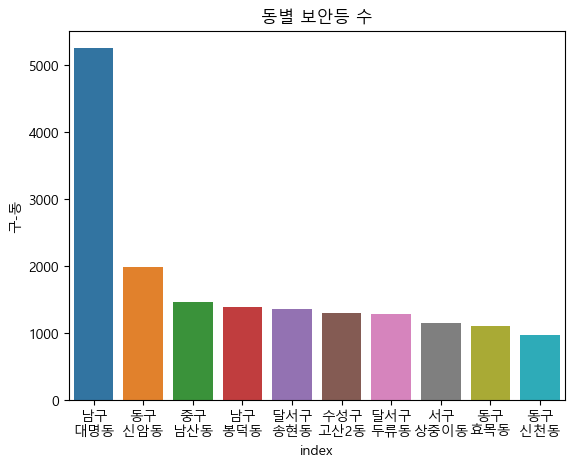

In [109]:
sns.barplot(x = 'index', y = '구-동', data = sec_num)
plt.title('동별 보안등 수')
plt.show()

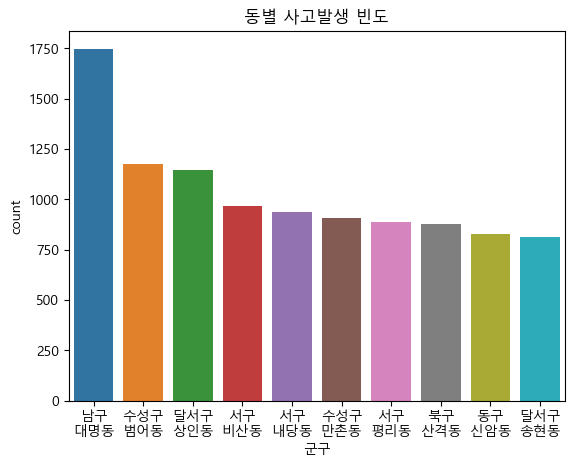

In [108]:
a = train['군구'].value_counts().to_frame()[:10]

sns.barplot(x = a.index, y = '군구', data = a)
plt.xlabel('군구')
plt.ylabel('count')
plt.title('동별 사고발생 빈도')
plt.show()

앞 분석에서 남구는 2번째로 사고발생빈도가 낮은 구였지만// 남구 대명동이 동별 사고발생 빈도가 가장 높았음

전체 모든 동 중 보안등 설치비율이 가장 높은 남구 대명동이<br>
전체 동별 사고발생 빈도에서 가장 큰 수를 차지했다.

따라서 1번 가설, <교통사고는 보안등이 설치된 곳에서 덜 발생할 것이다.>는 적합하지 않다.

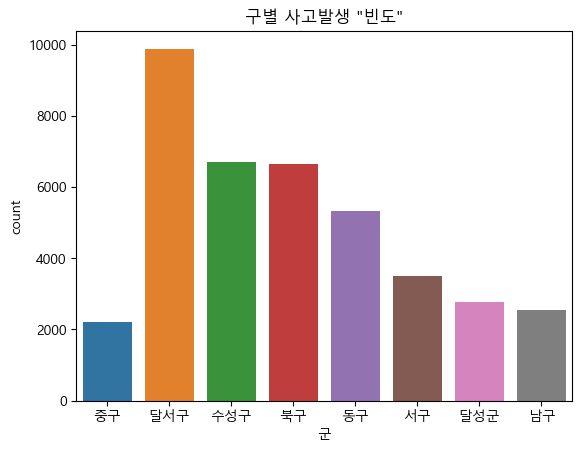

In [143]:
sns.countplot(x = '군', data = train)
plt.title('구별 사고발생 "빈도"')
plt.show()

## #2
어린이보호구역 주변에서는 교통사고 발생률이 낮을 것이다.

In [181]:
child_protectionzone['소재지지번주소'].value_counts(dropna = False)
#Nan값이 있어서 계속 float.split() error 발생

NaN                       85
대구광역시 달성군 옥포면 본리리 801      6
대구광역시 남구 대명동 2288          5
대구광역시 달성군 다사읍 서재리 32       4
대구광역시 달성군 현풍면 중리 483       4
                          ..
대구광역시 북구 국우동 753-1         1
대구광역시 북구 칠성동2가 395-1       1
대구광역시 북구 읍내동 1351          1
대구광역시 북구 칠성동2가 409-167     1
대구광역시 중구 남산동 2508-2        1
Name: 소재지지번주소, Length: 400, dtype: int64

In [183]:
child_protectionzone['소재지지번주소'].fillna("", inplace = True)

In [184]:
child_protectionzone['구-동'] = child_protectionzone['소재지지번주소'].apply(lambda x: '\n'.join(x.split()[1:-1]))

In [220]:
child = child_protectionzone['구-동'].value_counts().to_frame()
child = child.reset_index()
child.drop(0, inplace = True)
child

,index,구-동
1,남구\n대명동,26
2,달성군\n다사읍\n매곡리,24
3,서구\n비산동,19
4,수성구\n범어동,19
5,서구\n평리동,18
...,...,...
85,북구\n팔달동,1
86,북구\n조야동,1
87,북구\n고성동2가,1
88,북구\n도남동,1


In [253]:
b = train['군구'].value_counts().to_frame()
b
#동별 사고발생비율이 큰 순서

,군구
남구\n대명동,1749
수성구\n범어동,1173
달서구\n상인동,1143
서구\n비산동,968
서구\n내당동,938
...,...
중구\n도원동,2
동구\n신용동,2
중구\n동성로1가,2
북구\n도남동,2


In [254]:
def assign(x):
    try:
        return b.loc[x,'군구']
    except:
        return " "

child['사고발생 빈도'] = child['index'].apply(lambda x: assign(x))
child

,index,구-동,사고발생 빈도
1,남구\n대명동,26,1749
2,달성군\n다사읍\n매곡리,24,
3,서구\n비산동,19,968
4,수성구\n범어동,19,1173
5,서구\n평리동,18,885
...,...,...,...
85,북구\n팔달동,1,124
86,북구\n조야동,1,25
87,북구\n고성동2가,1,57
88,북구\n도남동,1,2


In [237]:
child[:20]

,index,구-동,사고발생 빈도
1,남구\n대명동,26,1749
2,달성군\n다사읍\n매곡리,24,
3,서구\n비산동,19,968
4,수성구\n범어동,19,1173
5,서구\n평리동,18,885
6,수성구\n만촌동,18,908
7,달성군\n다사읍\n서재리,16,
8,달성군\n다사읍\n죽곡리,16,
9,북구\n읍내동,13,401
10,북구\n태전동,13,705


train에 없는 군-구가 있어 정확한 분석이 어렵다.<br>
예상과 달리, 어린이 보호구역에서도 사고발생 빈도가 꽤 큰 것을 알 수 있다.<br>
어린이 보호구역이랑 상관이 없..?

## 3
주차장이 부족한 지역에서는 교통사고 발생률이 높을 것이다.

In [240]:
parking['소재지지번주소'].value_counts(dropna = False)

NaN                      96
대구광역시 서구 비산동 875         11
대구광역시 북구 노원동3가 252-3     11
대구광역시 북구 노원동2가 1          6
대구광역시 북구 산격동 1499-1       6
                         ..
대구광역시 북구 관음동 1244         1
대구광역시 북구 관음동 1252         1
대구광역시 북구 고성동1가 95-4       1
대구광역시 북구 칠성동2가 538-13     1
대구광역시 중구 동산동 194          1
Name: 소재지지번주소, Length: 682, dtype: int64

In [245]:
parking['소재지지번주소'].fillna('', inplace = True)

In [249]:
parking['구-동'] = parking['소재지지번주소'].apply(lambda x: '\n'.join(x.split()[1:-1]))
parking

,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,...,추가단위요금,1일주차권요금적용시간,1일주차권요금,월정기권요금,결제방법,특기사항,위도,경도,데이터기준일자,구-동
0,153-2-000001,봉덕공영주차장,공영,노외,대구광역시 남구 중앙대로22길 199,대구광역시 남구 봉덕동 1002-69,62,1,미시행,평일+토요일+공휴일,...,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842206,128.601725,2020-01-01,남구\n봉덕동
1,153-2-000002,봉삼공영주차장,공영,노외,NaN,대구광역시 남구 봉덕동 687-8,36,1,미시행,평일+토요일+공휴일,...,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842811,128.597209,2020-01-01,남구\n봉덕동
2,153-2-000003,대명2동공영주차장,공영,노외,대구광역시 남구 중앙대로45길 57,대구광역시 남구 대명동 1803-10,31,1,미시행,평일+토요일+공휴일,...,200.0,210.0,4000.0,40000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.855011,128.589359,2020-01-01,남구\n대명동
3,153-2-000004,고산골공영주차장,공영,노외,대구광역시 남구 용두2길 43,대구광역시 남구 봉덕동 1256,88,2,미시행,평일+토요일+공휴일,...,100.0,210.0,2000.0,20000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.830066,128.603443,2020-01-01,남구\n봉덕동
4,153-2-000005,봉덕시장공영주차장,공영,노외,대구광역시 남구 봉덕로25길 6,대구광역시 남구 봉덕동 976-5,32,1,미시행,평일+토요일+공휴일,...,200.0,160.0,3000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.844925,128.602667,2020-01-01,남구\n봉덕동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,150-4-000142,아세아유료주차장,민영,노외,대구광역시 중구 동덕로38길 14,대구광역시 중구 동인동1가 330-8,36,1,미시행,평일+토요일,...,500.0,NaN,NaN,NaN,현금,NaN,35.871292,128.605331,2019-06-21,중구\n동인동1가
867,150-4-000143,코끼리유료주차장,민영,노외,대구광역시 중구 달성로22길 88,대구광역시 중구 수창동 95-1,15,1,미시행,평일+토요일,...,NaN,NaN,NaN,NaN,현금,"1시간 2,000원",35.874460,128.586939,2019-06-21,중구\n수창동
868,150-4-000144,반월당유료주차장,민영,노외,대구광역시 중구 달구벌대로 2115-3(봉산동),대구광역시 중구 봉산동 38-2,20,1,미시행,평일+토요일,...,1000.0,NaN,NaN,NaN,현금,NaN,35.865434,128.595350,2019-06-21,중구\n봉산동
869,150-4-000145,동덕유료주차장,민영,노외,대구광역시 중구 동덕로 114-11,대구광역시 중구 삼덕동2가 246,40,1,미시행,평일+토요일,...,1000.0,NaN,NaN,NaN,현금,NaN,35.864850,128.603883,2019-06-21,중구\n삼덕동2가


In [260]:
p = parking['구-동'].value_counts().to_frame()
p = p.reset_index()
p

,index,구-동
0,,96
1,서구\n비산동,49
2,북구\n산격동,42
3,북구\n노원동3가,29
4,북구\n침산동,25
...,...,...
152,동구\n미대동,1
153,동구\n신천동\n281-10,1
154,동구\n동호동,1
155,동구\n지저동,1


In [261]:
def assign(x):
    try:
        return b.loc[x,'군구']
    except:
        return " "

p['사고발생 빈도'] = p['index'].apply(lambda x: assign(x))

In [262]:
p

,index,구-동,사고발생 빈도
0,,96,
1,서구\n비산동,49,968
2,북구\n산격동,42,879
3,북구\n노원동3가,29,299
4,북구\n침산동,25,668
...,...,...,...
152,동구\n미대동,1,10
153,동구\n신천동\n281-10,1,
154,동구\n동호동,1,188
155,동구\n지저동,1,178
